Vi vil se om der er en sammenhæng mellem skyldige personer og deres køn samt socioøkoknomisk status i tidsperioden 2015 til 2023. Vi har vi taget udgangspunkt i de datasæt fra Danmarks statistik som har relevant information til vores opgave. 

In [15]:
# For data storage and manipulation
import pandas as pd
# for numeric computations
import numpy as np
import os

In [16]:
# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# for ML methods and algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

In [18]:
# for serialization and deserialization of data from and to a file
import pickle

In [19]:
# read the data
file_paths = [
    "Skyldige personer efter køn, alder, socioøkoknomisk status og tid(2015-2023).xlsx",
    "Skyldige personer efter socioøkonomisk status, overtrædelsens art og tid(2015-2023).xlsx",
    "Skyldige personer i alderen 15-79 år efter køn, alder og oprindelsesland.xlsx",
    "Skyldige personer i alderen 15-79 år efter køn, alder, uddannelse og tid(2015-2023).xlsx"
]

dfs = []
years = [str(y) for y in range(2015, 2024)]

for file in file_paths:
    print(f"🔹 Loading: {file}")
    df = pd.read_excel(file, header=2)
    
    # Forward-fill any unnamed/descriptive columns
    unnamed_cols = [c for c in df.columns if "Unnamed" in str(c)]
    for col in unnamed_cols:
        df[col] = df[col].ffill()
    
    # Only rename columns that are truly unnamed
    rename_map = {}
    category_counter = 1
    for col in df.columns:
        if "Unnamed" in str(col):
            rename_map[col] = f"Category{category_counter}"
            category_counter += 1
    
    df.rename(columns=rename_map, inplace=True)
    
    # Keep only relevant columns: all text columns + year columns that exist
    text_cols = [c for c in df.columns if c not in years]
    keep_cols = text_cols + [y for y in years if y in df.columns]
    df = df[keep_cols]
    
    # Add source file column
    df["SourceFile"] = file.split("(")[0].strip()
    
    dfs.append(df)

# Merge all dataframes
df_all = pd.concat(dfs, ignore_index=True)


print(f"✅ Combined dataset shape: {df_all.shape}")
df_all.head()

🔹 Loading: Skyldige personer efter køn, alder, socioøkoknomisk status og tid(2015-2023).xlsx
🔹 Loading: Skyldige personer efter socioøkonomisk status, overtrædelsens art og tid(2015-2023).xlsx
🔹 Loading: Skyldige personer i alderen 15-79 år efter køn, alder og oprindelsesland.xlsx
🔹 Loading: Skyldige personer i alderen 15-79 år efter køn, alder, uddannelse og tid(2015-2023).xlsx
✅ Combined dataset shape: (1472, 26)


,Category1,Category2,Category3,2015,2016,2017,2018,2019,2020,2021,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Mænd,Alder i alt,I alt,121223.0,118869.0,112555.0,112883.0,123128.0,135465.0,128597.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mænd,Alder i alt,Selvstændige,8018.0,8906.0,7757.0,7237.0,7886.0,9429.0,8799.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mænd,Alder i alt,Lønmodtagere,62490.0,61367.0,58314.0,57347.0,64339.0,75069.0,70396.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mænd,Alder i alt,Arbejdsløse,2756.0,2474.0,1970.0,2086.0,2041.0,2136.0,3783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mænd,Alder i alt,Studerende,15179.0,15039.0,14581.0,15088.0,16272.0,15149.0,14911.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
year_cols = [str(y) for y in range(2015, 2024) if str(y) in df_all.columns]
df_all[year_cols] = df_all[year_cols].apply(lambda c: c.fillna(c.mean()))
df_all = df_all.drop_duplicates()
df_all.info()
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category1   1472 non-null   object 
 1   Category2   1472 non-null   object 
 2   Category3   718 non-null    object 
 3   2015        1472 non-null   float64
 4   2016        1472 non-null   float64
 5   2017        1472 non-null   float64
 6   2018        1472 non-null   float64
 7   2019        1472 non-null   float64
 8   2020        1472 non-null   float64
 9   2021        1472 non-null   float64
 10  2022        1472 non-null   float64
 11  2023        1472 non-null   float64
 12  SourceFile  1472 non-null   object 
 13  2000        600 non-null    float64
 14  2002        600 non-null    float64
 15  2004        600 non-null    float64
 16  2005        600 non-null    float64
 17  2006        600 non-null    float64
 18  2007        600 non-null    float64
 19  2008        600 non-null   

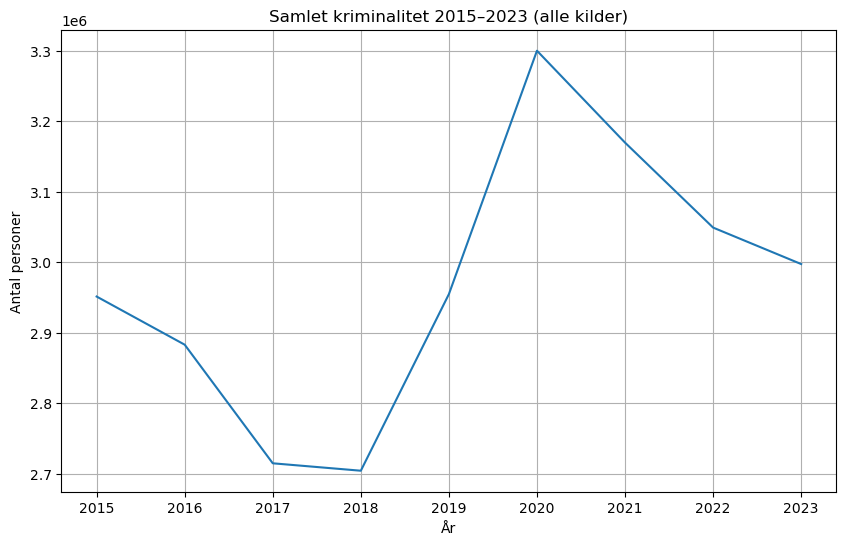

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Total across all files per year
totals = df_all[year_cols].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=year_cols, y=totals)
plt.title("Samlet kriminalitet 2015–2023 (alle kilder)")
plt.ylabel("Antal personer")
plt.xlabel("År")
plt.grid(True)
plt.show()


In [22]:
df_all.to_csv("clean_crime_data.csv", index=False)
print("💾 Saved unified dataset as data/clean_crime_data.csv")


💾 Saved unified dataset as data/clean_crime_data.csv


In [ ]:
# Data quality overview
print(df.info())
display(df.describe())
print(df.isnull().sum())


In [ ]:
totals = df[years].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=years, y=totals)
plt.title("Total antal dømte personer (2015–2023)")
plt.ylabel("Antal personer")
plt.xlabel("År")
plt.grid(True)
plt.show()


In [ ]:
print(df1.head())

In [ ]:
# list over rows and colums
[df1.shape, df2.shape, df3.shape, df4.shape]

In [25]:
# see which are the attribute labels
[list(df1),list(df2),list(df3),list(df4)]

[['Unnamed: 0',
  'Unnamed: 1',
  'Unnamed: 2',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023'],
 ['Unnamed: 0',
  'Unnamed: 1',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023'],
 ['Unnamed: 0',
  'Unnamed: 1',
  'Unnamed: 2',
  '2000',
  '2002',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023'],
 ['Unnamed: 0',
  'Unnamed: 1',
  'Unnamed: 2',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023']]

In [ ]:
# get idea of the look
[df1.sample(5),df2.sample(5),df3.sample(5),df4.sample(5)]

In [ ]:
# get idea of columns and types
[df1.info(),df2.info(),df3.info(),df4.info()]

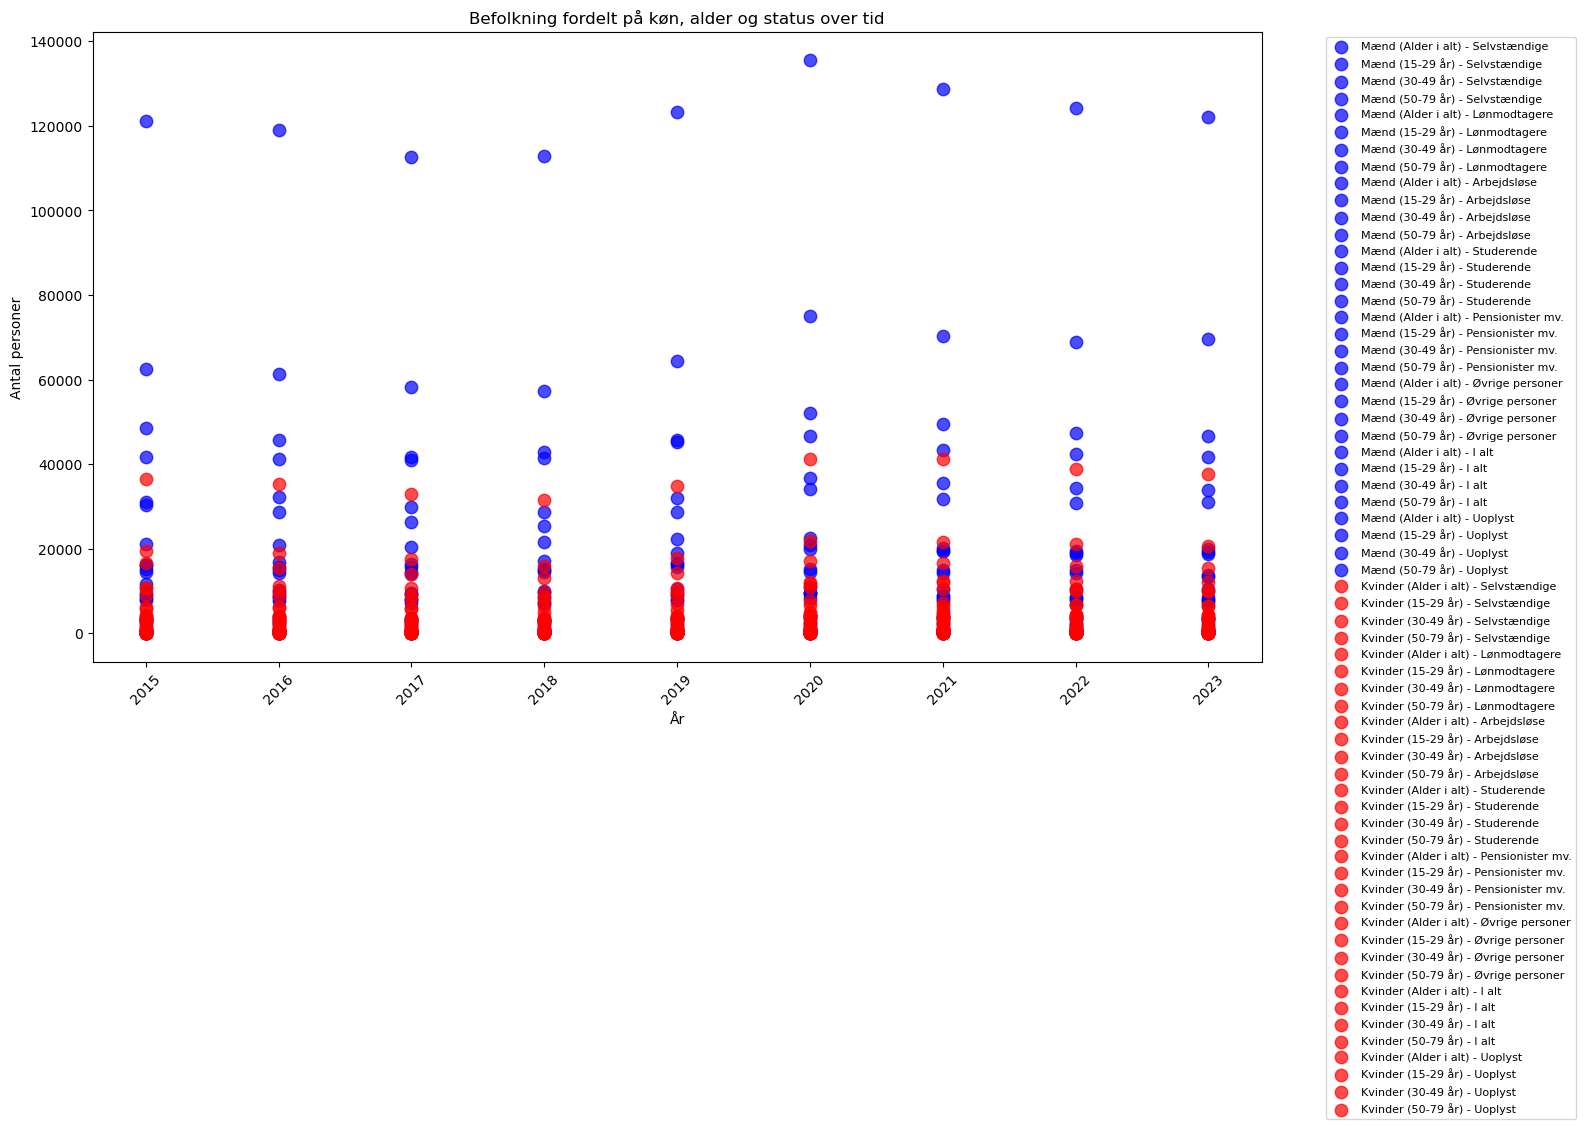

In [24]:
# Scatterplot for "Skyldige personer efter køn, alder, socioøkoknomisk status og tid(2015-2023)
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Fyld NaN forward
df1['Unnamed: 0'] = df1['Unnamed: 0'].ffill()
df1['Unnamed: 1'] = df1['Unnamed: 1'].ffill()

# Colors for gender
gender_farver = {'Mænd': 'blue', 'Kvinder': 'red'}

plt.figure(figsize=(16,10))

# Loop over gender
for gender, farve in gender_farver.items():
    df_gender = df1[df1['Unnamed: 0'] == gender]
    
    # Loop over status
    for status in ['Selvstændige', 'Lønmodtagere', 'Arbejdsløse', 
                   'Studerende', 'Pensionister mv.', 'Øvrige personer', 'I alt', 'Uoplyst']:
        df_status = df_gender[df_gender['Unnamed: 2'] == status]
        if not df_status.empty:
            for idx, row in df_status.iterrows():
                alder = row['Unnamed: 1']
                values = row[years].values.flatten()
                plt.scatter(
                    years, values,
                    color=farve,
                    marker='o',  # alle statuser som cirkler
                    s=80,
                    alpha=0.7,
                    label=f'{gender} ({alder}) - {status}'
                )

plt.xlabel("År")
plt.ylabel("Antal personer")
plt.title("Befolkning fordelt på køn, alder og status over tid")
plt.xticks(rotation=45)

# Remove duplicates in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

Grafen viser et samlet overblik over fordelingen af mænd og kvinder. Alder og status er lagt sammen så grafen kun tager henblik på en samlet overblik over kønsfordelingen af mænd og kvinder på de givende år. Her ses det tydligt hvordan der er langt flere mænd end kvinder uanset hvilket år som er blevet dømt for kriminalitet i Danmark.

In [ ]:
# Scatterplot for the different status for all men
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Fyld NaN forward
df1['Unnamed: 0'] = df1['Unnamed: 0'].ffill()
df1['Unnamed: 1'] = df1['Unnamed: 1'].ffill()

# Colors for status
status_farver = {
    'Selvstændige': 'red', 
    'Lønmodtagere': 'blue', 
    'Arbejdsløse': 'green', 
    'Studerende': 'orange', 
    'Pensionister mv.': 'purple', 
    'Øvrige personer': 'brown',
    'I alt': 'black',
    'Uoplyst': 'gray'
}

plt.figure(figsize=(16,10))

# Filter men only
df_mænd = df1[df1['Unnamed: 0'] == 'Mænd']

# Loop over status
for status, farve in status_farver.items():
    df_status = df_mænd[df_mænd['Unnamed: 2'] == status]
    if not df_status.empty:
        for idx, row in df_status.iterrows():
            alder = row['Unnamed: 1']
            values = row[years].values.flatten()
            plt.scatter(
                years, values,
                color=farve,
                s=80,
                alpha=0.7,
                label=f'{status} ({alder})'
            )

plt.xlabel("År")
plt.ylabel("Antal personer")
plt.title("Mænd - Befolkning fordelt på status og alder over tid")
plt.xticks(rotation=45)

# Remove duplicates in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

Grafen har taget udgangspunkt i dataen omhandlende mænd, her ses det hvordan at lønmodtagerene er den største del af de dømte mænd i Danmark kontra arbejdsløse og selvstændige som ligger lavest.

In [ ]:
# Scatterplot for the different status for all women
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Fyld NaN forward
df1['Unnamed: 0'] = df1['Unnamed: 0'].ffill()
df1['Unnamed: 1'] = df1['Unnamed: 1'].ffill()

# Colors for status
status_farver = {
    'Selvstændige': 'red', 
    'Lønmodtagere': 'blue', 
    'Arbejdsløse': 'green', 
    'Studerende': 'orange', 
    'Pensionister mv.': 'purple', 
    'Øvrige personer': 'brown',
    'I alt': 'black',
    'Uoplyst': 'gray'
}

plt.figure(figsize=(16,10))

# Filter only women
df_kvinder = df1[df1['Unnamed: 0'] == 'Kvinder']

# Loop over status
for status, farve in status_farver.items():
    df_status = df_kvinder[df_kvinder['Unnamed: 2'] == status]
    if not df_status.empty:
        for idx, row in df_status.iterrows():
            alder = row['Unnamed: 1']
            values = row[years].values.flatten()
            plt.scatter(
                years, values,
                color=farve,
                s=80,
                alpha=0.7,
                label=f'{status} ({alder})'
            )

plt.xlabel("År")
plt.ylabel("Antal personer")
plt.title("Kvinder - Befolkning fordelt på status og alder over tid")
plt.xticks(rotation=45)

# Remove duplicates in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

Grafen som den forrige viser sammen sammenhæng blot over kvinderne. Igen her er der flest lønmodtager som bliver dømt for kriminalitet i Danmark.

In [ ]:
# histograms
hist = df1.hist(figsize=(30,20))

Hvert histogram viser fordelingen af antal personer for ét specifikt år på tværs af alle køn, aldersgrupper og socioøkonomiske statusser. 

In [ ]:
# distribution of age and gender
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Filter genders
df_plot = df1[df1['Unnamed: 0'].isin(['Mænd','Kvinder'])]
df_plot = df_plot[df_plot['Unnamed: 1'].notna()]
df_plot = df_plot[df_plot['Unnamed: 2'] != 'I alt']  # fjern 'I alt', hvis ønsket

# Total number of people per gender and age group (over all years)
df_plot['Total'] = df_plot[years].sum(axis=1)

# Pivot to get gender as columns
df_pivot = df_plot.pivot_table(index='Unnamed: 1', columns='Unnamed: 0', values='Total', aggfunc='sum')

# Create stacked bar plot
df_pivot.plot(kind='bar', figsize=(12,6), color=['red','blue'])

plt.xlabel("Aldersgruppe")
plt.ylabel("Antal personer")
plt.title("Fordeling af aldersgrupper for mænd og kvinder")
plt.show()

Her ses kønsfordelingen for mænd og kvinder i de forskellige aldersgrupper, tydligt fremstår det hvordan at der er langt større antal dømte mænd end kvinder, og gældende for begge køn er der flere i aldersgruppen 30-49 år.

In [ ]:
# distribution of age and gender
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Filtrer kun relevante køn og aldersgrupper
df_plot = df1[df1['Unnamed: 0'].isin(['Mænd','Kvinder'])]
df_plot = df_plot[df_plot['Unnamed: 1'].isin(['15-29 år','30-49 år','50-79 år'])]

# Summer alle år for hver række
df_plot['Total'] = df_plot[years].sum(axis=1)

# Sæt aldersgrupper
age_groups = ['15-29 år','30-49 år','50-79 år']
genders = ['Mænd','Kvinder']

fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()  # Gør det nemt at iterere

for i, gender in enumerate(genders):
    for j, age in enumerate(age_groups):
        ax = axes[i*3 + j]
        # Filtrer for denne kombination af køn og aldersgruppe
        df_subset = df_plot[(df_plot['Unnamed: 0']==gender) & (df_plot['Unnamed: 1']==age)]
        # Tag kun Total
        values = df_subset['Total']
        # Histogram med KDE
        sns.histplot(values, kde=True, stat="density", bins=10, color='skyblue', ax=ax)
        ax.set_title(f'{gender} - {age}')
        ax.set_xlabel('Antal personer')
        ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

Hver graf viser en skæv fordeling (højre-skæv), fordi nogle statusser (fx Lønmodtagere) har meget høje værdier, mens andre (fx Selvstændige eller Uoplyst) er meget små. Hver graf viser fordelingen af, hvor mange personer der samlet set i perioden tilhører de forskellige socioøkonomiske grupper i den aldersgruppe.

In [ ]:
# to check null values in data
[df1.isnull().sum(),df2.isnull().sum(),df3.isnull().sum(),df4.isnull().sum()]

In [ ]:
# get idea of basic statistical parameters for each column
[df1.describe(),df2.describe(),df3.describe(),df4.describe()]

In [ ]:
# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [ ]:
# box-wisker plot
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Remove both "Alder i alt" and "I alt"
df_plot = df1[
    (df1['Unnamed: 0'].isin(['Mænd','Kvinder'])) &                  
    (df1['Unnamed: 1'].isin(['15-29 år','30-49 år','50-79 år'])) &  
    (df1['Unnamed: 2'] != 'I alt')                                  
]

# Merge the dataset so that all years become one column
df_melted = df_plot.melt(
    id_vars=['Unnamed: 0','Unnamed: 1','Unnamed: 2'],
    value_vars=years,
    var_name='År',
    value_name='Antal personer'
)

plt.figure(figsize=(12,8))
sns.boxplot(
    data=df_melted,
    x='Unnamed: 1',   # aldersgruppe
    y='Antal personer',
    hue='Unnamed: 0'  # køn
)
plt.xlabel("Aldersgruppe")
plt.ylabel("Antal personer (2015-2023)")
plt.title("Boxplot af antal personer fordelt på køn og aldersgruppe")
plt.legend(title="Køn")
plt.show()

Grafen viser en sammenligning af antallet af personer (y-aksen) fordelt på alder (x-aksen: 15-29 år, 30-49 år, 50-79 år) og opdelt efter køn (blå for mænd, orange for kvinder). For hver aldersgruppe ses det at mænd generelt udgør et højere antal personer end kvinder, det betyder at mænd i gennemsnit udgør en større del af de skyldige i den aldersgruppe. Dette er ens på tværs af alle aldersgrupper.
En høj boks betyder at der er stor variation i antallet mellem de forskellige socioøkonomiske grupper samt at der er mange outliers. Dett betyder at nogle statusgrupper afviger meget i forhold til de øvrige (fx "Lønmodtagere" som ofte er mange flere end "Selvstændige").

In [ ]:
# Select only the numeric columns (years 2015–2023)
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Fill forward for NaN in category columns
df1['Unnamed: 0'] = df1['Unnamed: 0'].ffill()
df1['Unnamed: 1'] = df1['Unnamed: 1'].ffill()
df1['Unnamed: 2'] = df1['Unnamed: 2'].ffill()

# Filtrer kun numeriske kolonner (år)
df_num = df1[years]

# Filter only numeric columns (years)
df_pct_change = df_num.pct_change(axis=1, fill_method=None).iloc[:, 1:]

# Correlation of percentage changes
corr_matrix = df_pct_change.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Korrelation'})
plt.title("Korrelationsmatrix for procentvise ændringer mellem årene")
plt.show()

Heatmappet viser korrelationen mellem de procentvise ændringer i antal personer fra år til år, hvordan mønstrene i procentvise ændringer er mellem forskellige år. Høj korrelation mellem to år betyder at de fleste grupper ændrer sig på samme måde i de to år.
Fx hvis Mænd 15-29 voksede med 5% i 2016, vil Mænd 15-29 sandsynligvis have en lignende procentændring i 2017, hvis korrelationen er høj.

Konklusion: Efter at havde kigget dataen igennem og opsat flere grafer over den gældende data kan vi kluduere at der er en sammenhæng mellem skyldige personer og deres køn samt socioøkoknomisk status i tidsperioden 2015 til 2023. Ud fra dataen er den største gruppe lønmodtager mænd i alderen 30-49 år, her kan vi tyde at der er en sammenhæng mellem køn og socioøkoknomisk status.